# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
response = requests.get(query_url + cities[0]).json()
print(json.dumps(response, indent = 4))

{
    "coord": {
        "lon": 29.7185,
        "lat": 70.6345
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 24.37,
        "feels_like": 10.06,
        "temp_min": 23,
        "temp_max": 26.6,
        "pressure": 1005,
        "humidity": 74
    },
    "visibility": 10000,
    "wind": {
        "speed": 16.11,
        "deg": 30
    },
    "snow": {
        "1h": 0.32
    },
    "clouds": {
        "all": 75
    },
    "dt": 1614899087,
    "sys": {
        "type": 1,
        "id": 1618,
        "country": "NO",
        "sunrise": 1614921116,
        "sunset": 1614957216
    },
    "timezone": 3600,
    "id": 780717,
    "name": "B\u00e5tsfjord",
    "cod": 200
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
lat = []
lon = []
max_temp = []
humidity = []
cld_cover = []
wind_spd = []
country = []
date_time = []
city_name = []


for city in cities:
    response = requests.get(query_url + city).json()
    try:
        wx_response = response["weather"]
    except KeyError:
        print(f'--------------------------------------------------------------------')
        print(f'Warning: {city} data is unavailable')
        print(f'--------------------------------------------------------------------')
        continue
    lat.append(response["coord"]["lat"])
    lon.append(response["coord"]["lon"])
    max_temp.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    cld_cover.append(response["clouds"]["all"])
    wind_spd.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    date_time.append(response["dt"])
    city_name.append(response["name"])
    print(f'Processing Name: {response["name"]} ID: {response["id"]}')

Processing Name: Båtsfjord ID: 780717
Processing Name: Atuona ID: 4020109
Processing Name: Severo-Kuril'sk ID: 2121385
Processing Name: Talnakh ID: 1490256
Processing Name: Muros ID: 3115824
Processing Name: Zheleznodorozhnyy ID: 463355
Processing Name: Kapaa ID: 5848280
Processing Name: Torbay ID: 6167817
Processing Name: Lagoa ID: 3372964
Processing Name: St. George's ID: 3579925
Processing Name: Clyde River ID: 5924351
Processing Name: Aykhal ID: 2027296
Processing Name: Albany ID: 5106841
Processing Name: Hobart ID: 2163355
Processing Name: Esim ID: 2303611
Processing Name: Vardø ID: 777019
Processing Name: Gimli ID: 5961417
Processing Name: Rikitea ID: 4030556
Processing Name: Puerto Ayora ID: 3652764
Processing Name: Ushuaia ID: 3833367
Processing Name: Nālūt ID: 2214432
Processing Name: Balkanabat ID: 161616
Processing Name: Jiangyou ID: 1885823
Processing Name: Hilo ID: 5855927
Processing Name: Aklavik ID: 5882953
Processing Name: Yellowknife ID: 6185377
Processing Name: Arraia

In [5]:
print(len(lat))
print(len(lon))
print(len(max_temp))
print(len(humidity))
print(len(cld_cover))
print(len(wind_spd))
print(len(country))
print(len(date_time))
print(len(city))

572
572
572
572
572
572
572
572
11


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({"City": city_name,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Max Temperature": max_temp,
                           "Humidity": humidity,
                           "Cloud Cover": cld_cover,
                           "Wind Speed": wind_spd,
                           "Country": country,
                           "Date Time": date_time,
                          })
weather_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date Time
0,Båtsfjord,70.6345,29.7185,26.60,74,75,16.11,NO,1614899087
1,Atuona,-9.8000,-139.0333,79.92,75,1,13.24,PF,1614898975
2,Severo-Kuril'sk,50.6789,156.1250,31.68,97,89,17.90,RU,1614899088
3,Talnakh,69.4865,88.3972,-4.70,89,100,8.68,RU,1614899090
4,Muros,42.7762,-9.0603,53.01,86,97,1.99,ES,1614899090
...,...,...,...,...,...,...,...,...,...
567,Necochea,-38.5473,-58.7368,66.99,88,46,7.00,AR,1614899703
568,Koshurnikovo,54.1667,93.3000,7.63,94,100,3.60,RU,1614899707
569,Norden,53.6000,7.2000,36.00,74,38,1.99,DE,1614899708
570,Carazinho,-28.2839,-52.7864,65.93,98,100,3.78,BR,1614899711


In [7]:
# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv("Output/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df.loc[weather_df["Humidity"] > 100]

,City,Latitude,Longitude,Max Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date Time


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

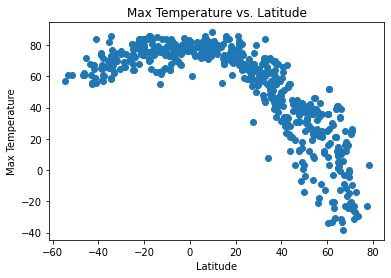

In [44]:
# Scatter plot
x = weather_df["Latitude"]
y = weather_df["Max Temperature"]
plt.scatter(x,y)
plt.title("Max Temperature vs. Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.savefig("Output/Max_Temperature_vs._Latitude.png")

## Latitude vs. Humidity Plot

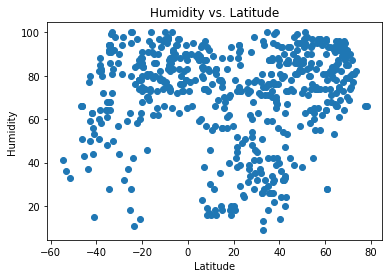

In [45]:
# Scatter plot
x = weather_df["Latitude"]
y = weather_df["Humidity"]
plt.scatter(x,y)
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("Output/Humidity_vs._Latitude.png")

## Latitude vs. Cloudiness Plot

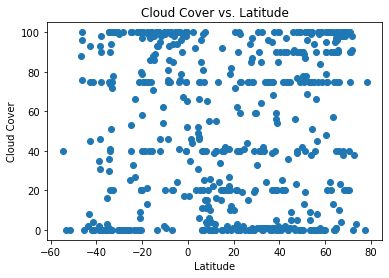

In [46]:
# Scatter plot
x = weather_df["Latitude"]
y = weather_df["Cloud Cover"]
plt.scatter(x,y)
plt.title("Cloud Cover vs. Latitude")
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.savefig("Output/Cloud_Cover_vs._Latitude.png")

## Latitude vs. Wind Speed Plot

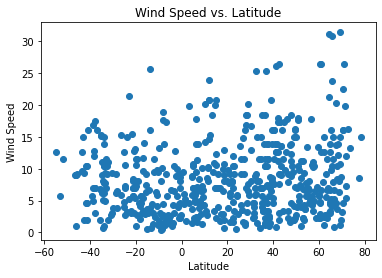

In [47]:
# Scatter plot
x = weather_df["Latitude"]
y = weather_df["Wind Speed"]
plt.scatter(x,y)
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("Output/Wind_Speed_vs._Latitude.png")

## Linear Regression

In [15]:
n_hem_df = weather_df.loc[weather_df["Latitude"] > 0]
s_hem_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

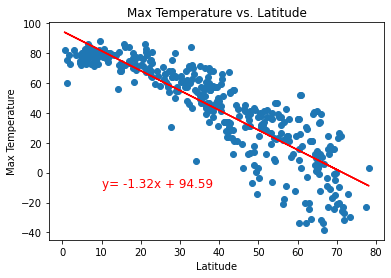

The correlation between both factors is -0.87


In [48]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = n_hem_df["Latitude"]
y = n_hem_df["Max Temperature"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=12,color="red")
plt.title("Max Temperature vs. Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.savefig("Output/NHLR_Max_Temperature_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

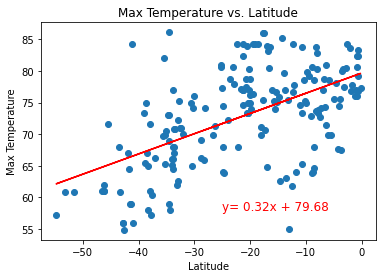

The correlation between both factors is 0.56


In [49]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = s_hem_df["Latitude"]
y = s_hem_df["Max Temperature"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,58),fontsize=12,color="red")
plt.title("Max Temperature vs. Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.savefig("Output/SHLR_Max_Temperature_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

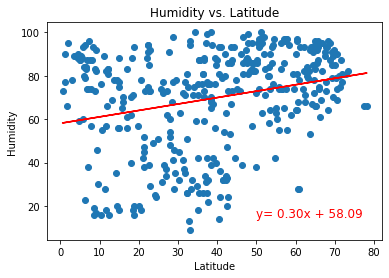

The correlation between both factors is 0.26


In [50]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = n_hem_df["Latitude"]
y = n_hem_df["Humidity"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=12,color="red")
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("Output/NHLR_Humidity_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

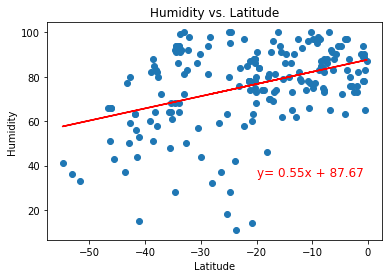

The correlation between both factors is 0.4


In [51]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = s_hem_df["Latitude"]
y = s_hem_df["Humidity"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,35),fontsize=12,color="red")
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("Output/SHLR_Humidity_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

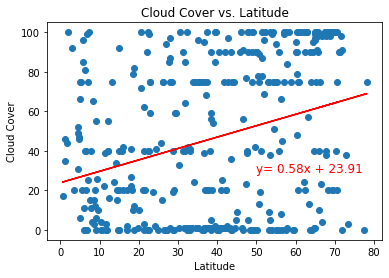

The correlation between both factors is 0.3


In [54]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = n_hem_df["Latitude"]
y = n_hem_df["Cloud Cover"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,29),fontsize=12,color="red")
plt.title("Cloud Cover vs. Latitude")
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.savefig("Output/NHLR_Cloud_Cover_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

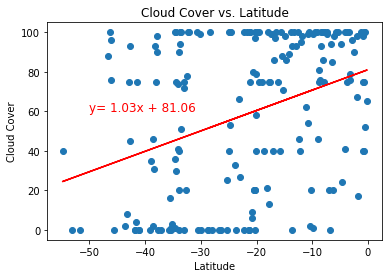

The correlation between both factors is 0.36


In [55]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = s_hem_df["Latitude"]
y = s_hem_df["Cloud Cover"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=12,color="red")
plt.title("Cloud Cover vs. Latitude")
plt.ylabel("Cloud Cover")
plt.xlabel("Latitude")
plt.savefig("Output/SHLR_Cloud_Cover_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

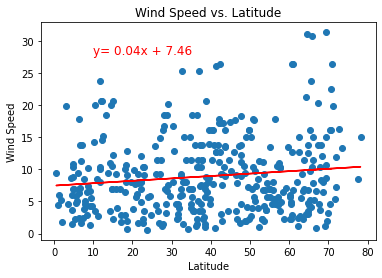

The correlation between both factors is 0.13


In [53]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = n_hem_df["Latitude"]
y = n_hem_df["Wind Speed"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,28),fontsize=12,color="red")
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("Output/NHLR_Wind_Speed_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

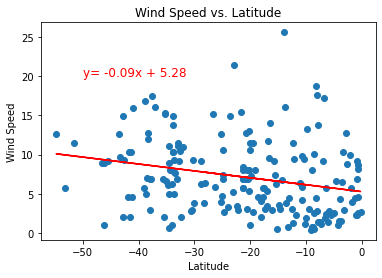

The correlation between both factors is -0.25


In [52]:
# correlation and linear regression scatter plot
# declare variables for x and y
x = s_hem_df["Latitude"]
y = s_hem_df["Wind Speed"]

# Calculate Correlation
correlation = st.pearsonr(x,y)

# calc line for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"

# Scatter plot chart with line 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("Output/SHLR_Wind_Speed_vs._Latitude.png")
plt.show()

# Print Correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")